<a href="https://colab.research.google.com/github/gyuchangShim/MJU_AI/blob/VGG16-CNN/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

In [2]:
print(device_lib.list_local_devices())
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

tf.test.is_gpu_available()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1891208361474807218
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5547424166039818236
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
def VGG16():
    tf.random.set_seed(2)
    model = tf.keras.models.Sequential([
        # input = 224 x 224 x 3

        # 224 x 224 x 64
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),

        # 112 x 112 x 64
        layers.MaxPool2D((2, 2), padding='same'),

        # 112 x 112 x 128
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),

        # 56 x 56 x 128
        layers.MaxPool2D((2, 2), padding='same'),

        # 56 x 56 x 256
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),

        # 28 x 28 x 256
        layers.MaxPool2D((2, 2), padding='same'),

        # 28 x 28 x 512
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),

        # 14 x 14 x 512
        layers.MaxPool2D((2, 2), padding='same'),

        # 14 x 14 x 512
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),

        # 7 x 7 x 512
        layers.MaxPool2D((2, 2), padding='same'),

        # 1 x 1 x 25088
        layers.Flatten(),
        layers.Dropout(0.5),

        # 1 x 1 x 4096
        layers.Dense(4096, activation='relu'),

        # 1 x 1 x 4096
        layers.Dense(4096, activation='relu'),

        # 1 x 1 x 1000
        layers.Dense(1000, activation='relu'),

        # 1 x 1 x 2
        layers.Dense(2, activation='softmax'),
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [4]:
# Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train_dataset_path = '/content/gdrive/MyDrive/dataset/train_set/'
train_data_generator = ImageDataGenerator(rescale=1. / 255)
train_dataset = train_data_generator.flow_from_directory(train_dataset_path,
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical')


valid_dataset_path = '/content/gdrive/MyDrive/dataset/validate_set/'
valid_data_generator = ImageDataGenerator(rescale=1. / 255)
valid_dataset = valid_data_generator.flow_from_directory(valid_dataset_path,
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical')


Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
# Train
print("Start Train!")
model = VGG16()
model.summary()
train = model.fit(train_dataset, epochs=5, validation_data=valid_dataset)

Start Train!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                      

Saved Accuracy graph


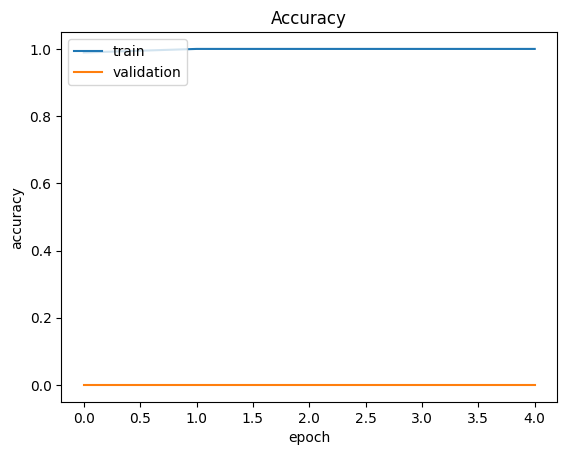

In [9]:
# Accuracy graph
plt.figure(1)
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('VGG16_Accuracy_1.png')
print("Saved Accuracy graph")

Saved Loss graph


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


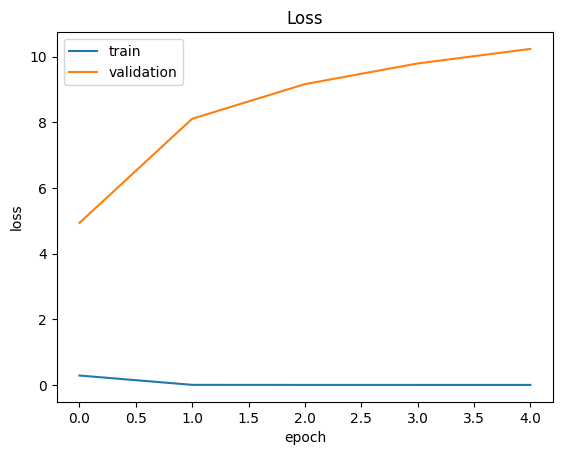

In [8]:
# Loss graph
plt.figure(2)
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('VGG16_Loss_1.png')
print("Saved Loss graph")

model.save('VGG16.h5')